In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [10]:
n = 2500

data = {
    0: np.random.uniform(0, 1, (n, 2)),
    1: np.vstack((np.random.uniform(0, 1, n), np.random.beta(1.5, 2, n))).T,
    2: np.random.beta(1.5, 2, (n, 2))   
}

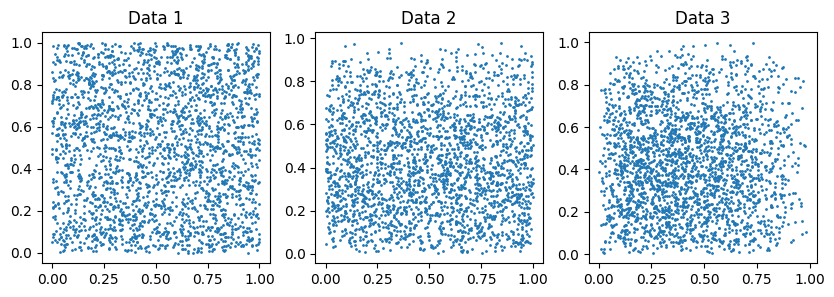

In [11]:
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(data[i][:, 0], data[i][:, 1], s=1)
    plt.title("Data %d" % (i+1))

In [8]:
# construct k-nearest neighbor graph and self tuned gaussian kernel 
from sklearn.neighbors import kneighbors_graph
k = 24
k_tune = 7
knn_graph = {} # graph adjacency matrix
selftune_rbf_kernel = {} # self tuned gaussian kernel
for i in range(3):
    knn_graph[i] = kneighbors_graph(data[i], n_neighbors=k, mode='connectivity')
    selftune_rbf_kernel[i] = kneighbors_graph(data[i], n_neighbors=k_tune, mode='distance')

array([[0.63775141, 0.11511631],
       [0.84962418, 0.03776079],
       [0.23092574, 0.70051561],
       ...,
       [0.90316146, 0.32864465],
       [0.84699507, 0.32796012],
       [0.42540347, 0.44580437]])

In [ ]:
def selftune_rbf(distances, ktune=7)-> np.array:
    '''
        Inputs:
            distances: Euclidean distances between points, shape (n, n)
            ktune: number of nearest neighbors used to compute sigma
        Outputs:
            K: self tuned gaussian kernel, shape (n, n)
    '''
    n = distances.shape[0] 
    median = np.median(distances, axis=1)
    sigma = median.reshape(-1, 1) * median
    K = np.exp(-distances**2 / sigma)
    return K
    